# LOG Work Document

In [253]:
#Import modules
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote, quote
import scraping_class
from tqdm import tqdm_notebook
import requests,os,time

In [222]:
# Load the log.csv and define the seperator
log_df = pd.read_csv('log_course.csv', sep=',') # load the ,-separated log 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

log_df

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error
0,198,course_links,requests,1.567008e+09,-0.127659,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37026,200,True,NaN
1,199,course_links,requests,1.567008e+09,-0.111698,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37027,200,True,NaN
2,200,course_links,requests,1.567008e+09,-0.104713,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,36942,200,True,NaN
3,201,course_links,requests,1.567008e+09,-0.102679,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37120,200,True,NaN
4,202,course_links,requests,1.567008e+09,-0.153993,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37970,200,True,NaN
5,203,course_links,requests,1.567008e+09,-0.151144,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38004,200,True,NaN
6,204,course_links,requests,1.567008e+09,-0.159537,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38249,200,True,NaN
7,205,course_links,requests,1.567008e+09,-0.135081,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38173,200,True,NaN
8,206,course_links,requests,1.567008e+09,-0.124667,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37286,200,True,NaN
9,207,course_links,requests,1.567008e+09,-0.133730,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38613,200,True,NaN


In [ ]:
import datetime

In [224]:
dt = log_df.t.values[0]

In [225]:
log_df

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error
0,198,course_links,requests,1.567008e+09,-0.127659,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37026,200,True,NaN
1,199,course_links,requests,1.567008e+09,-0.111698,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37027,200,True,NaN
2,200,course_links,requests,1.567008e+09,-0.104713,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,36942,200,True,NaN
3,201,course_links,requests,1.567008e+09,-0.102679,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37120,200,True,NaN
4,202,course_links,requests,1.567008e+09,-0.153993,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37970,200,True,NaN
5,203,course_links,requests,1.567008e+09,-0.151144,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38004,200,True,NaN
6,204,course_links,requests,1.567008e+09,-0.159537,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38249,200,True,NaN
7,205,course_links,requests,1.567008e+09,-0.135081,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38173,200,True,NaN
8,206,course_links,requests,1.567008e+09,-0.124667,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,37286,200,True,NaN
9,207,course_links,requests,1.567008e+09,-0.133730,https://kurser.ku.dk/archive/2017-2018/course/...,https://kurser.ku.dk/archive/2017-2018/course/...,38613,200,True,NaN


In [227]:
log_df["response_code"].unique()

array([200], dtype=int64)

Text(0, 0.5, 'Response code')

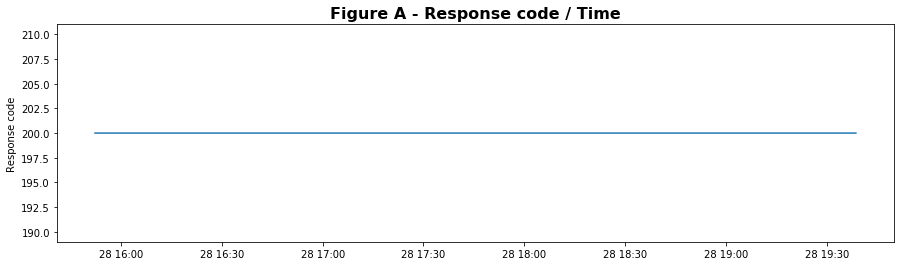

In [228]:
import datetime
# Convert the time column 't' to datetime 
log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.title("Figure A - Response code / Time", fontsize = 16, weight = "bold")
plt.plot(log_df.dt,log_df.response_code)
plt.ylabel('Response code')


Text(0, 0.5, 'Delta t')

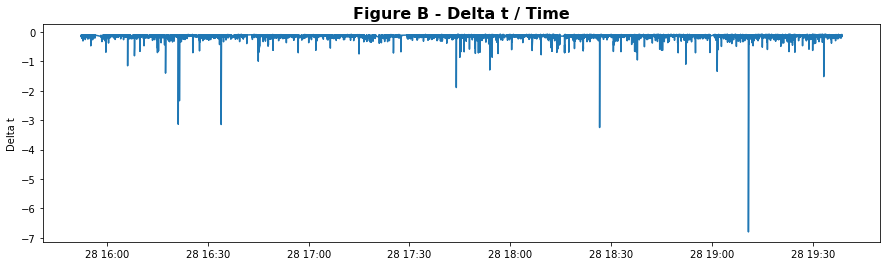

In [229]:
import datetime
# Convert the time column 't' to datetime 
log_df['dt'] = log_df.t.apply(datetime.datetime.fromtimestamp)
log_df['dt'] = pd.to_datetime(log_df.t,unit='s')

# Plot the time it took to make the call
plt.figure(figsize=(15,4))
plt.plot(log_df.dt,log_df.delta_t)
plt.title("Figure B - Delta t / Time", fontsize = 16, weight = "bold")
plt.ylabel('Delta t')

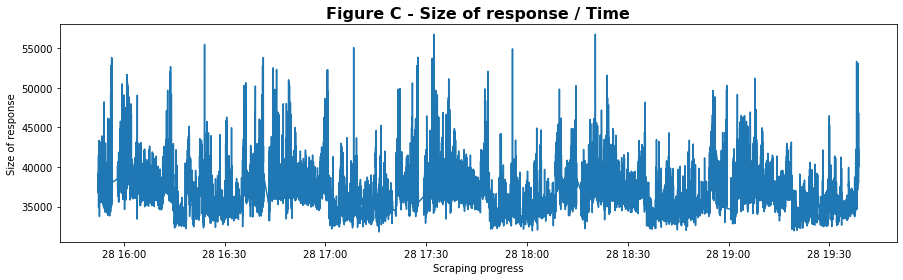

In [230]:
plt.figure(figsize=(15,4))
plt.ylabel('Size of response')
plt.xlabel('Scraping progress')
plt.title("Figure C - Size of response / Time", fontsize = 16, weight = "bold")
plt.plot(log_df.dt,log_df.response_size)

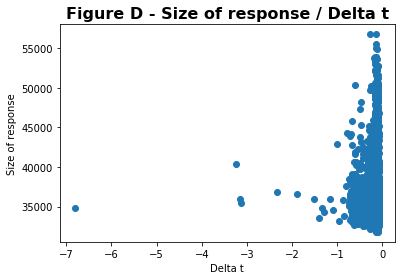

In [231]:
plt.title("Figure D - Size of response / Delta t", fontsize = 16, weight = "bold")
plt.ylabel('Size of response')
plt.xlabel('Delta t')
plt.scatter(log_df.delta_t,log_df.response_size)

In [252]:
log_df_sortbydeltat = log_df.sort_values(by="delta_t")
print(log_df_sortbydeltat["url"][15])

https://kurser.ku.dk/archive/2017-2018/course/AANB05093U


In [234]:
print(log_df.success.value_counts()) ## Count errors
print(len(log_df))
## Groupby time
# round the time for aggregation
#log_df['dt_minute'] = log_df.dt.apply(lambda x: x-datetime.timedelta(seconds=x.second,microseconds=x.microsecond))
#log_df['dt_hour'] = log_df.dt.apply(lambda x: x-datetime.timedelta(minutes=x.minute,seconds=x.second,microseconds=x.microsecond))
#log_df.groupby('dt_hour').success.mean()

True    18183
Name: success, dtype: int64
18183
